<a href="https://colab.research.google.com/github/skimaza/assist/blob/main/perceptron_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 전략경영MBA 경영자를 위한 딥러닝 원리의 이해
# 단순한 퍼셉트론

# 라이브러리 import


## numpy는 수식 계산 라이브러리
## numpy 라이브러리를 읽어들이고 np라는 약자로 사용하겠다

In [ ]:
import numpy as np

Colab에서 하나의 실행 단위는 위와 같이 [숫자] 형태로 구분된다.  
이것을 cell 이라하고 묶음으로 실행된다.

## matplotlib는 그래프를 그리는 등 시각화를 하는 라이브러리
## matplotlib의 pyplot이라는 모듈을 plt라는 약자로 사용하겠다

In [ ]:
import matplotlib.pyplot as plt

## 실험할 변수를 정의하여 초기화하고 샘플 데이터를 만든다
## 샘플 데이터는 numpy 배열

In [ ]:
weights = []
errors_log = []
epochs = 25
eta = 0.01
data = np.array([[3, 3, 1], 
                 [3.5, 2.5, 1], 
                 [1, 0.5, -1], 
                 [0.5, 0.75, -1], 
                 [2, 1.5, -1], 
                 [1.5, 2, -1], 
                 [2.3, 1.8, 1]])

In [ ]:
print('type of data variable:', type(data))
print(data)

type of data variable: <class 'numpy.ndarray'>
[[ 3.    3.    1.  ]
 [ 3.5   2.5   1.  ]
 [ 1.    0.5  -1.  ]
 [ 0.5   0.75 -1.  ]
 [ 2.    1.5  -1.  ]
 [ 1.5   2.   -1.  ]
 [ 2.3   1.8   1.  ]]


In [ ]:
data.shape

(7, 3)

data는 7x3 배열 (7 rows, 3 columns)  
원소 몇 개만 프린트 해보자

In [ ]:
data[0,0]

3.0

여기서 프린트된 3.0은 Colab cell의 마지막 줄인 data[0,0]의 값이다.  
print 문의 결과와 유사하게 보이기 때문에 혼동하지 않도록 하자.

In [ ]:
print(data[0,2])
data[0,0]

1.0


3.0

마지막 줄의 값을 프린트하지 않게 하려면 줄 끝에 ';'을 붙인다

In [ ]:
print(data[0,2])
data[0,0];

1.0


'#'은 comment의 시작을 표시하며 Colab에서는 녹색으로 표시된다.  
마지막 줄에 여러 값을 ','로 구분하면 여러 값이 한꺼번에 리턴된다

In [ ]:
data[0,1], data[1,0] # '#'을 쓰면 comment의 시작, colab 셀의 마지막 줄은 

(3.0, 3.5)

3.5

파이썬 리스트나 배열은 ':'을 사용해서 묶음으로 처리할 수 있다

In [ ]:
data[0, :], data[1, :] # 0번 row의 모든 column, 1번 row의 모든 column

(array([3., 3., 1.]), array([3.5, 2.5, 1. ]))

In [ ]:
data

array([[ 3.  ,  3.  ,  1.  ],
       [ 3.5 ,  2.5 ,  1.  ],
       [ 1.  ,  0.5 , -1.  ],
       [ 0.5 ,  0.75, -1.  ],
       [ 2.  ,  1.5 , -1.  ],
       [ 1.5 ,  2.  , -1.  ],
       [ 2.3 ,  1.8 ,  1.  ]])

In [ ]:
data[:, 0], data[:, 2] # 모든 row의 0번 column, 모든 row의 2번 column

(array([3. , 3.5, 1. , 0.5, 2. , 1.5, 2.3]),
 array([ 1.,  1., -1., -1., -1., -1.,  1.]))

# Data 플롯

2번 column 값이 1인 data 만 고르기

In [ ]:
data[:, 2] == 1

array([ True,  True, False, False, False, False,  True])

In [ ]:
data[data[:, 2] == 1] # [ ] 안의 값이 True인 것만 추출

array([[3. , 3. , 1. ],
       [3.5, 2.5, 1. ],
       [2.3, 1.8, 1. ]])

In [ ]:
pos = data[[data[:, 2] == 1]] # warning은 무시해도 됨

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [ ]:
pos

array([[3. , 3. , 1. ],
       [3.5, 2.5, 1. ],
       [2.3, 1.8, 1. ]])

In [ ]:
neg = data[[data[:, 2] == -1]] # 2번 column이 -1인 것만 추출
neg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([[ 1.  ,  0.5 , -1.  ],
       [ 0.5 ,  0.75, -1.  ],
       [ 2.  ,  1.5 , -1.  ],
       [ 1.5 ,  2.  , -1.  ]])

In [ ]:
pos[:, 0], pos[:, 1] # pos의 0번 column과 pos의 1번 column

(array([3. , 3.5, 2.3]), array([3. , 2.5, 1.8]))

## pos의 0번 column을 x축, 1번 column을 y축으로 하는 그래프
## pos의 0번 column을 x축, 1번 column을 y축으로 하는 그래프

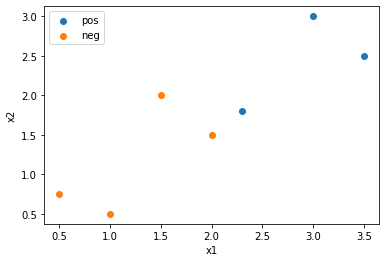

In [ ]:
plt.scatter(pos[:,0], pos[:, 1], label="pos")
plt.scatter(neg[:,0], neg[:, 1], label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2)

# Perceptron 학습 함수
- weights와 errors_log는 글로벌 변수로 지정  
- weights 값은 0으로 초기화한 후 학습  
- 학습은 epochs 만큼 반복  
- eta는 그리스 문자 eta이며 learning rate를 표시하는 옛날식 관행.  
- 지금은 lr이란 이름을 주로 사용함.

In [ ]:
def train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []

    for i in range(epochs):
        errors = 0
        print("EPOCHS", i+1)
        for xi, target in zip(X, y):
            update = eta * (target - predict(xi)) # perceptron의 결과와 truth 값 비교
            print(xi, "target", target, "sum", net_input(xi), "update", update)
            if update != 0:
                weights[1:] +=  update * xi
                weights[0] +=  update
                print("Updated WEIGHTS", weights)
                errors += int(update != 0.0)
        errors_log.append(errors)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0] # dot product

def predict(X):
    return np.where(net_input(X) > 0.0, 1, -1)

In [ ]:
np.dot(np.array([1,2,3]), np.array([1, -1, 1])) # (1 * 1) + (2 * (-1)) + (2 * 1), dot product 연산 : 각 위치마다 대응하는 원소끼리 곱한 후 결과를 더한다

2

np.dot은 입력과 weights의 가중합 계산  

In [ ]:
np.where(np.array([0.5, -0.3, 0.9]) > 0.0, 1, -1) # 첫번 인자의 각 원소에 대해 조건을 검사하여 True면 두번째 인자를, False면 세번째 인자를 넣은 배열을 리턴

array([ 1, -1,  1])

predict는 X를 weights와 dot product한 결과가 0보다 크면 1, 작으면 -1을 리턴  
thresholding 함수 기능

update 부분 추가 설명
target이 1이고 predict(x)가 -1이면 target - predict(x)는 2  
target이 -1이고 predict(x)가 1이면 target - predict(x)는 -2  
update는 이 값에 eta를 곱한 값
update가 양수면   

In [ ]:
data[:, :2]

array([[3.  , 3.  ],
       [3.5 , 2.5 ],
       [1.  , 0.5 ],
       [0.5 , 0.75],
       [2.  , 1.5 ],
       [1.5 , 2.  ],
       [2.3 , 1.8 ]])

In [ ]:
data[:, 2]

array([ 1.,  1., -1., -1., -1., -1.,  1.])

In [ ]:
data[:, :2].shape

(7, 2)

In [ ]:
train(data[:, :2], data[:, 2], epochs=50)

Initial weights [0. 0. 0.]
EPOCHS 1
[3. 3.] target 1.0 sum 0.0 update 0.02
Updated WEIGHTS [0.02 0.06 0.06]
[3.5 2.5] target 1.0 sum 0.38 update 0.0
[1.  0.5] target -1.0 sum 0.11 update -0.02
Updated WEIGHTS [0.   0.04 0.05]
[0.5  0.75] target -1.0 sum 0.057499999999999996 update -0.02
Updated WEIGHTS [-0.02   0.03   0.035]
[2.  1.5] target -1.0 sum 0.09249999999999997 update -0.02
Updated WEIGHTS [-0.04  -0.01   0.005]
[1.5 2. ] target -1.0 sum -0.04500000000000002 update 0.0
[2.3 1.8] target 1.0 sum -0.05400000000000002 update 0.02
Updated WEIGHTS [-0.02   0.036  0.041]
EPOCHS 2
[3. 3.] target 1.0 sum 0.211 update 0.0
[3.5 2.5] target 1.0 sum 0.2085 update 0.0
[1.  0.5] target -1.0 sum 0.03649999999999999 update -0.02
Updated WEIGHTS [-0.04   0.016  0.031]
[0.5  0.75] target -1.0 sum -0.008750000000000008 update 0.0
[2.  1.5] target -1.0 sum 0.038499999999999986 update -0.02
Updated WEIGHTS [-0.06  -0.024  0.001]
[1.5 2. ] target -1.0 sum -0.09400000000000001 update 0.0
[2.3 1.8] ta

In [ ]:
print(errors_log)

[5, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
weights[0]

-0.19999999999999998

In [ ]:
weights[1]

0.04399999999999996

In [ ]:
weights[2]

0.05900000000000016

In [ ]:
- weights[0] / weights[2]

3.389830508474567

In [ ]:
- weights[0] / weights[1]

4.5454545454545485

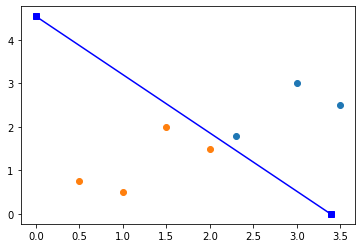

In [ ]:


fig = plt.figure()
ax = fig.add_subplot(111)
point_x = np.array([0, - weights[0] / weights[2]])
point_y = np.array([- weights[0] / weights[1], 0])
line, = ax.plot(point_x, point_y, 'bs-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], label="pos")
ax.scatter(neg[:,0], neg[:, 1], label="neg")

plt.show()